# Armed Conflict Location & Event Data (ACLED)

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("ACLED.csv").convert_dtypes()

### Rows and Columns

In [4]:
rows, columns = df.shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 58725, Columns: 41


In [5]:
df['date'] = pd.to_datetime(df['yearmon'], errors='coerce').dt.date
df = df.convert_dtypes()
df = df.set_index(['date']).sort_index()
df = df.drop(columns=['yearmon'])

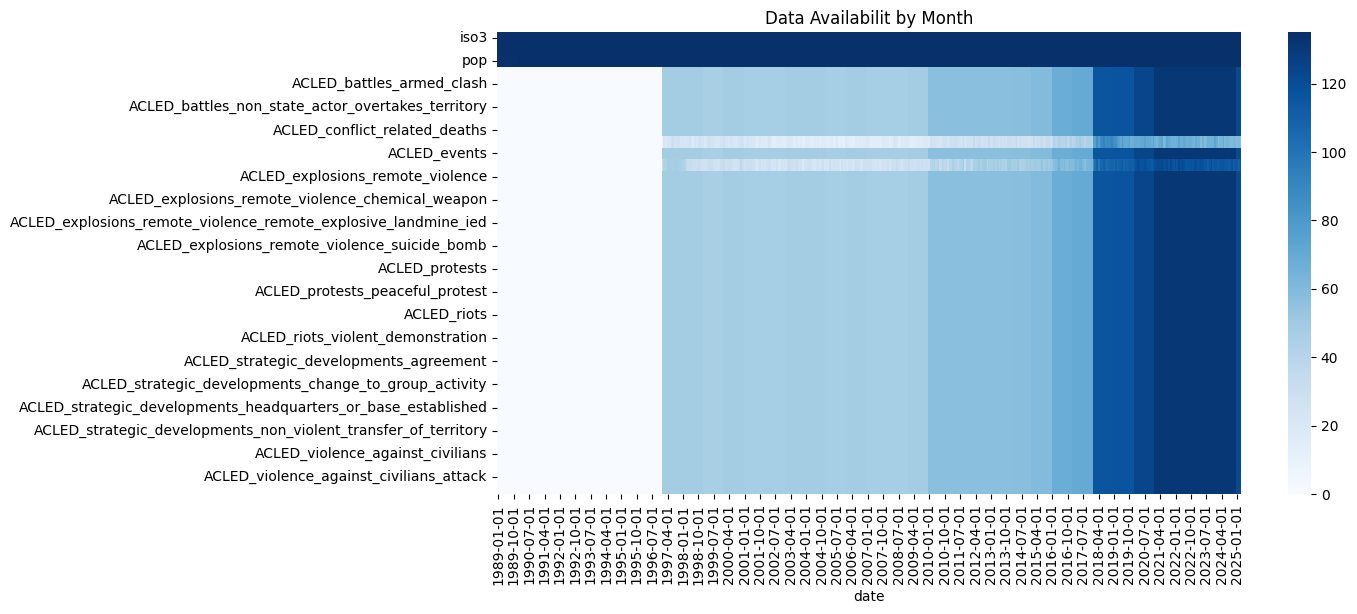

In [6]:
missing_by_month = df.groupby('date').count()
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

### Sample data features

In [7]:
df.tail().T

date,2025-03-01,2025-03-01,2025-03-01,2025-03-01,2025-03-01
iso3,BLZ,TUV,ZMB,TUN,ZWE
region_code,LAC,EAP,SSA,MNA,SSA
pop,411106.0,9816.0,20723965.0,12200431.0,16340822.0
ACLED_battles,2,<NA>,0,0,0
ACLED_battles_armed_clash,0,<NA>,0,0,0
ACLED_battles_government_regains_territory,0,<NA>,0,0,0
ACLED_battles_non_state_actor_overtakes_territory,0,<NA>,0,0,0
ACLED_BRD_per_100k,1.216231,<NA>,0.0,0.0,0.0
ACLED_conflict_related_deaths,5,<NA>,0,0,0
ACLED_conflict_related_deaths_change,0.818182,<NA>,<NA>,<NA>,<NA>


### Data structure, data types, and non-null counts

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58725 entries, 1989-01-01 to 2025-03-01
Data columns (total 40 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   iso3                                                                58725 non-null  string 
 1   region_code                                                         58725 non-null  string 
 2   pop                                                                 58713 non-null  Float64
 3   ACLED_battles                                                       24150 non-null  Int64  
 4   ACLED_battles_armed_clash                                           24150 non-null  Int64  
 5   ACLED_battles_government_regains_territory                          24150 non-null  Int64  
 6   ACLED_battles_non_state_actor_overtakes_territory                   24150 non-null  Int64  
 7   ACLE

### Descriptive statistics of categorical columns

In [9]:
df.describe(include='string').T

,count,unique,top,freq
iso3,58725,135,AFG,435
region_code,58725,6,SSA,20445


### Descriptive statistics of numerical columns

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
pop,58713.0,41259533.486332,153319719.021372,8662.0,2108617.0,8303151.0,25698326.0,1438069596.0
ACLED_battles,24150.0,17.191677,78.29626,0.0,0.0,0.0,4.0,1978.0
ACLED_battles_armed_clash,24150.0,13.23735,69.529239,0.0,0.0,0.0,3.0,1959.0
ACLED_battles_government_regains_territory,24150.0,0.447867,4.378439,0.0,0.0,0.0,0.0,189.0
ACLED_battles_non_state_actor_overtakes_territory,24150.0,0.312008,3.633643,0.0,0.0,0.0,0.0,183.0
ACLED_BRD_per_100k,24150.0,0.477997,7.974958,0.0,0.0,0.0,0.057362,751.046195
ACLED_conflict_related_deaths,24150.0,90.539213,572.883166,0.0,0.0,0.0,16.0,44825.0
ACLED_conflict_related_deaths_change,12009.0,0.326208,14.257265,-1.0,-0.713311,-0.284211,0.185542,1465.0
ACLED_events,24150.0,72.104762,281.317906,0.0,0.0,4.0,27.0,5913.0
ACLED_events_change,19144.0,inf,<NA>,-1.0,-0.52,-0.139889,0.290912,inf


### Deatils of missing values in the features

In [11]:
# Step 1: Create missing summary
total_rows = len(df)
missing_count = df.isnull().sum()
missing_percent = (missing_count / total_rows * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage (%)': missing_percent
}).sort_values(by='Missing Percentage (%)', ascending=False)

# Step 2: Drop columns with >70% overall missing AND >20% missing in last 5 years of the data
for col in missing_df.index:
    if missing_percent[col] > 70:
        if 'date' in df.columns and pd.api.types.is_datetime64_any_dtype(df['date']):
            max_date = df['date'].max()
            five_years_ago = max_date - pd.DateOffset(years=5)
            recent_df = df[df['date'] >= five_years_ago]
            recent_missing = recent_df[col].isnull().sum()
            recent_total = recent_df[col].shape[0]
            if recent_total == 0 or (recent_missing / recent_total * 100) > 20:
                df = df.drop(columns=[col])
        else:
            df = df.drop(columns=[col])  # Drop if no date context

# Step 3: Extract clean numeric data
numeric_df = df.select_dtypes(include=['number'])
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)
numeric_df = numeric_df.dropna(axis=1, how='all')  # Drop all-NaN columns
numeric_df = numeric_df.dropna(axis=0, how='any')  # Drop rows with any NaN


In [12]:
columns = missing_df[missing_df['Missing Percentage (%)'] < 70].index
df = df[columns]

numeric_df = df.select_dtypes(include=['number']).dropna()


In [13]:
missing_by_iso3 = df.groupby('iso3').count()
missing_by_month = df.groupby('date').count()

### Availability of data by country

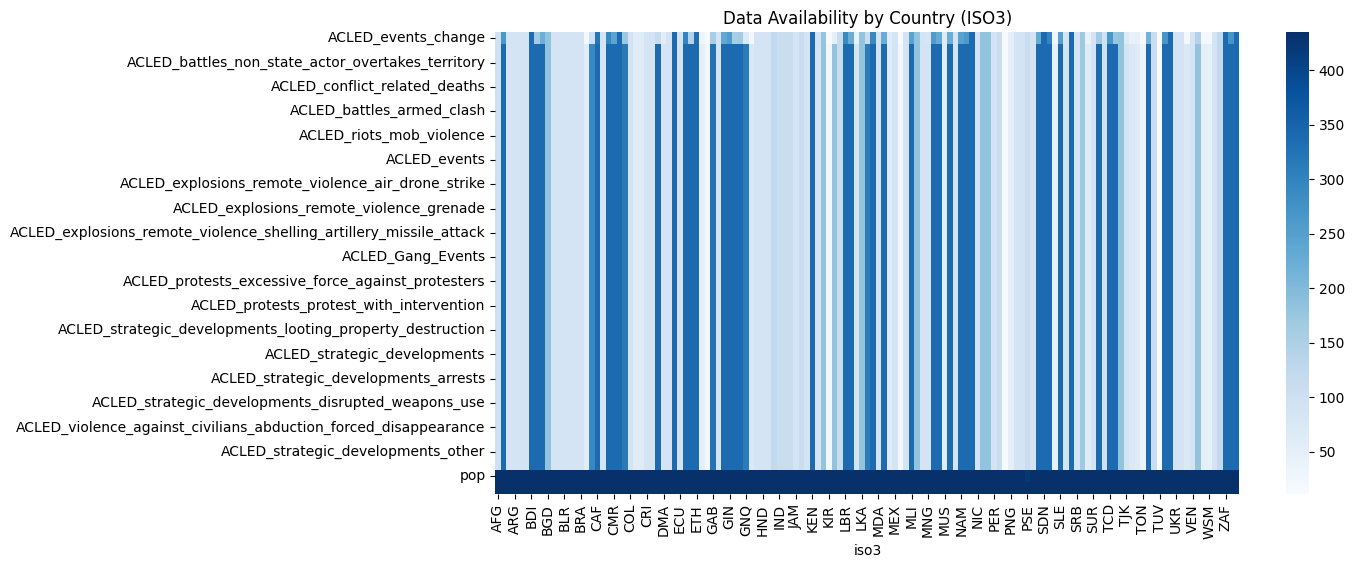

In [14]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_iso3.astype(float).T, cmap='Blues')
plt.title('Data Availability by Country (ISO3)')
plt.show()

### Availbility of data by month

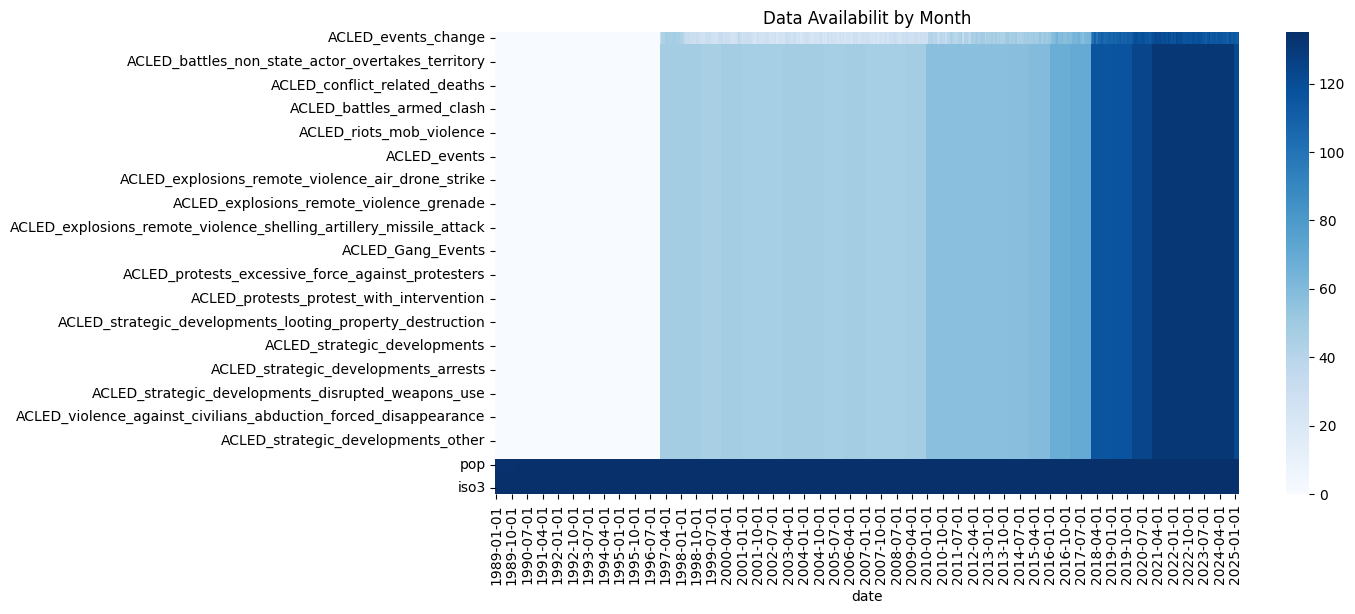

In [15]:
plt.figure(figsize=(12, 6))
sns.heatmap(missing_by_month.astype(float).T, cmap='Blues')
plt.title('Data Availabilit by Month')
plt.show()

In [16]:
#Correlation Matrix
correlation_matrix_df = numeric_df.corr(method='pearson')

In [17]:
numeric_df.shape

(19144, 37)

## Correlation between features

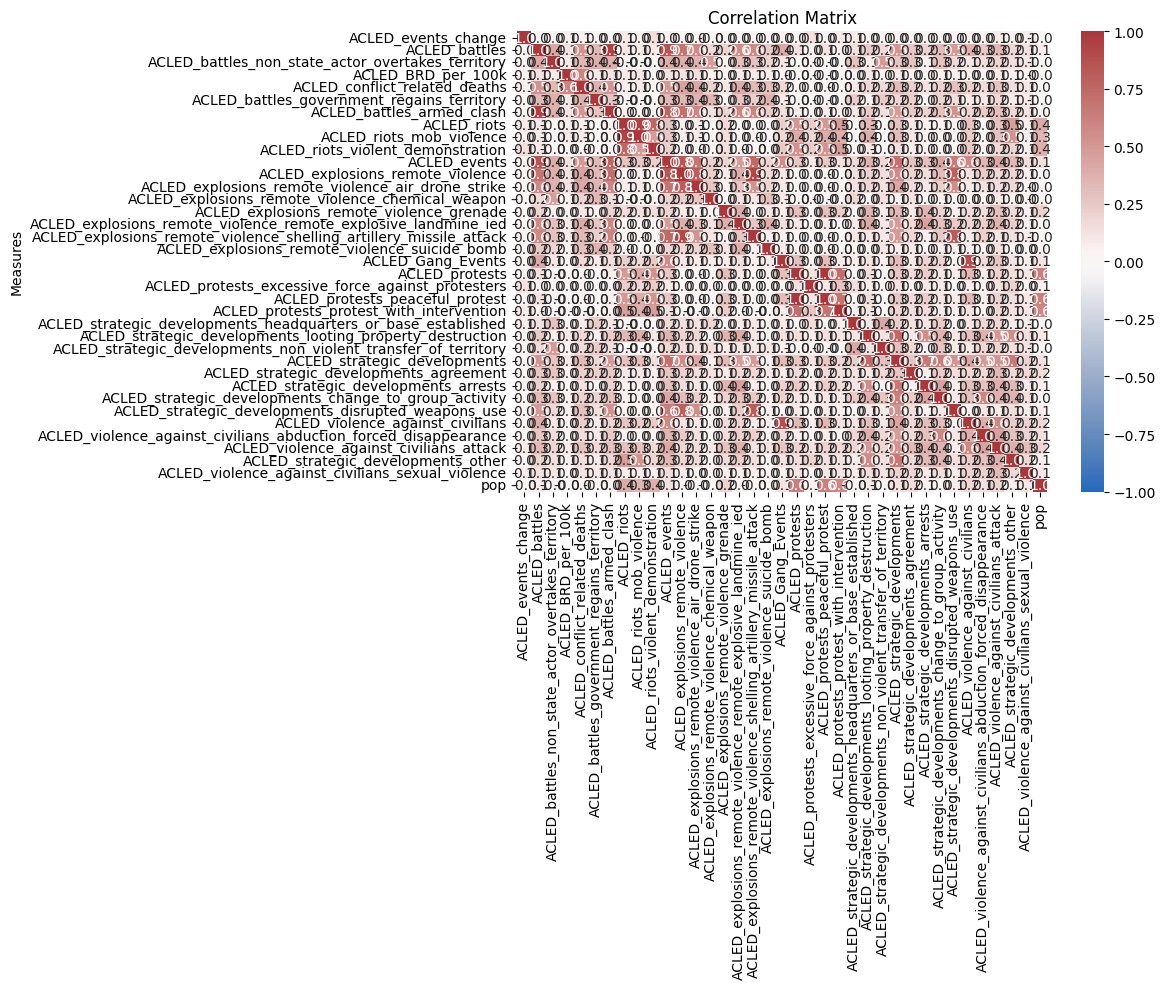

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

In [22]:
# Extract upper triangle of correlation matrix without the diagonal
corr_matrix = correlation_matrix_df.copy()
mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
filtered_corr = corr_matrix.where(mask)

# Stack and filter for |correlation| > 0.5
tidy_corr = (
    filtered_corr.stack()
    .reset_index()
    .rename(columns={'level_0': 'Variable 1', 'level_1': 'Variable 2', 0: 'Correlation'})
)
tidy_corr = tidy_corr[(tidy_corr['Correlation'] > 0.5) | (tidy_corr['Correlation'] < -0.5)]
if not tidy_corr.empty:
    tidy_corr.to_excel("ACAPS_correlations_filtered.xlsx", index=False)
    print("✅ Correlation pairs saved to ACAPS_correlations_filtered.xlsx")
else:
    print("⚠️ No correlation pairs above 0.5 or below -0.5 were found.")

# Add source column
source='ACLED'
tidy_corr.insert(0, 'Source', source)

# Save to Excel
tidy_corr.to_excel(f"{source}_correlations_filtered.xlsx", index=False)

print(f"✅ Correlation pairs saved to {source}_correlations_filtered.xlsx")


✅ Correlation pairs saved to ACAPS_correlations_filtered.xlsx
✅ Correlation pairs saved to ACLED_correlations_filtered.xlsx


### Replacing infinite values with NaN

In [20]:
# Replace infs with NaN
numeric_df = numeric_df.replace([np.inf, -np.inf], np.nan)

# Drop rows with NaN (can also use fillna if preferred)
numeric_df = numeric_df.dropna()

# Clip extreme values to keep columns like ACLED_events_change
too_large = (numeric_df.abs() > 1e308).any()
for col in numeric_df.columns[too_large]:
    numeric_df[col] = np.clip(numeric_df[col], -1e308, 1e308)

# Confirm everything is clean
assert np.isfinite(numeric_df).all().all(), "Still contains invalid values"



### Principal Components Analysis of the features

In [23]:
scaler = StandardScaler()
# Proceed with PCA
X_scaled = StandardScaler().fit_transform(numeric_df)
X_pca = PCA(n_components=0.75).fit_transform(X_scaled)
X_pca = pca.fit_transform(X_scaled)
n_components = X_pca.shape[1]
print(f"Number of components retained: {n_components}")
columns = [f'PC{i+1}' for i in range(n_components)]
print(f"Column names for PCA components: {columns}")

NameError: name 'pca' is not defined

In [ ]:
pca_df = pd.DataFrame(X_pca, index=numeric_df.index, columns=columns)

In [ ]:
pca_correlation_matrix_df = pca_df.corr(method='pearson')

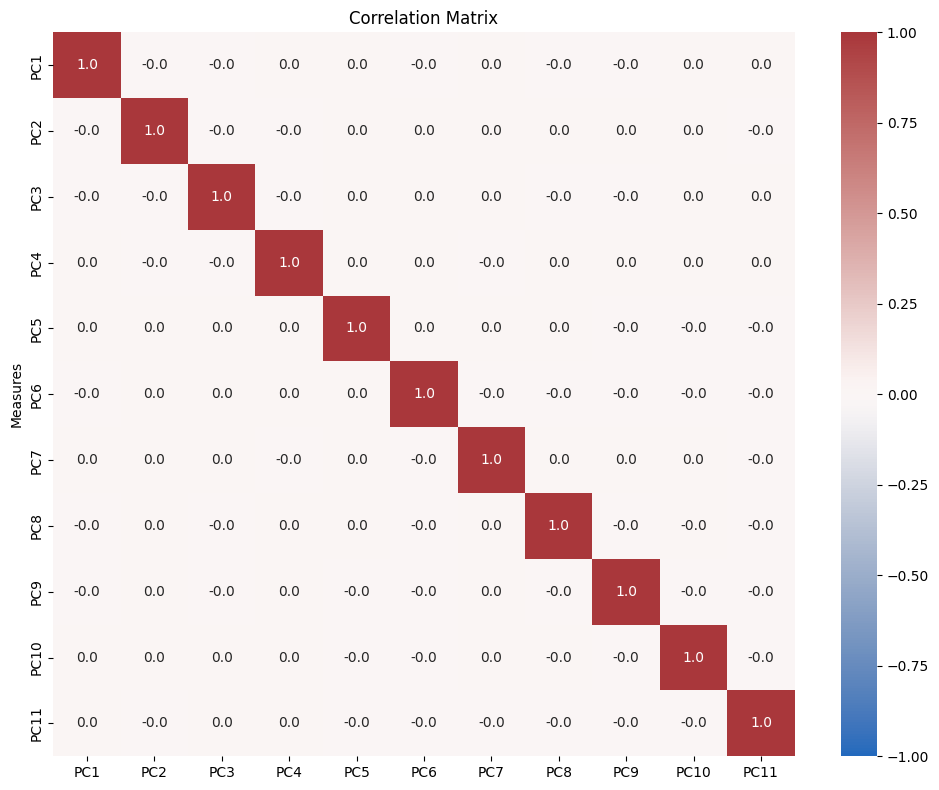

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(pca_correlation_matrix_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
plt.title('Correlation Matrix')
plt.ylabel('Measures')
plt.tight_layout()
plt.show()

### Explained Variance by Principal Component

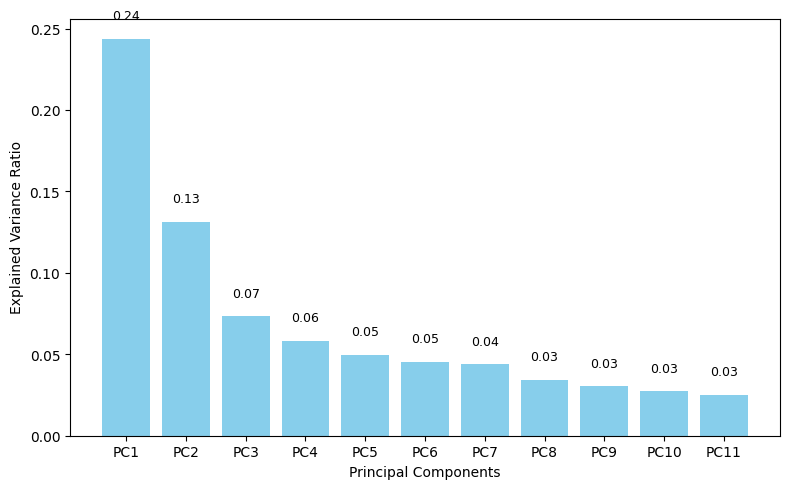

In [ ]:
# Get explained variance ratios
explained_variance = pca.explained_variance_ratio_
components = np.arange(1, len(explained_variance) + 1)
labels = [f'PC{i}' for i in components]

# Plot bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(x=components, height=explained_variance, tick_label=labels, color='skyblue')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.01, f"{height:.2f}",
             ha='center', va='bottom', fontsize=9)

plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
# plt.title('Explained Variance by Principal Component')
plt.tight_layout()
plt.show()

### Cumulative Explained Variance

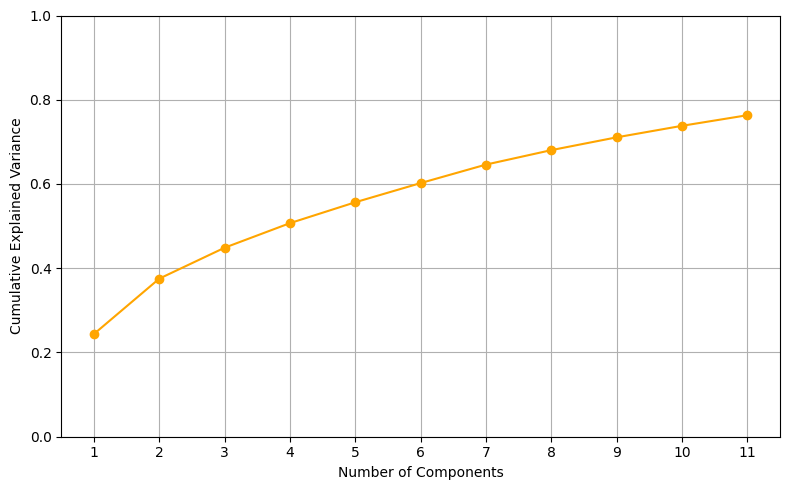

In [ ]:
# Cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, n_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
# plt.title('Cumulative Explained Variance')
plt.xticks(np.arange(1, n_components + 1, step=1))
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
feature_names = numeric_df.columns
components = pca.components_
loadings_df = pd.DataFrame(components.T, index=feature_names, columns=[f'PC{i+1}' for i in range(components.shape[0])])

### PCA Loadings Heatmap

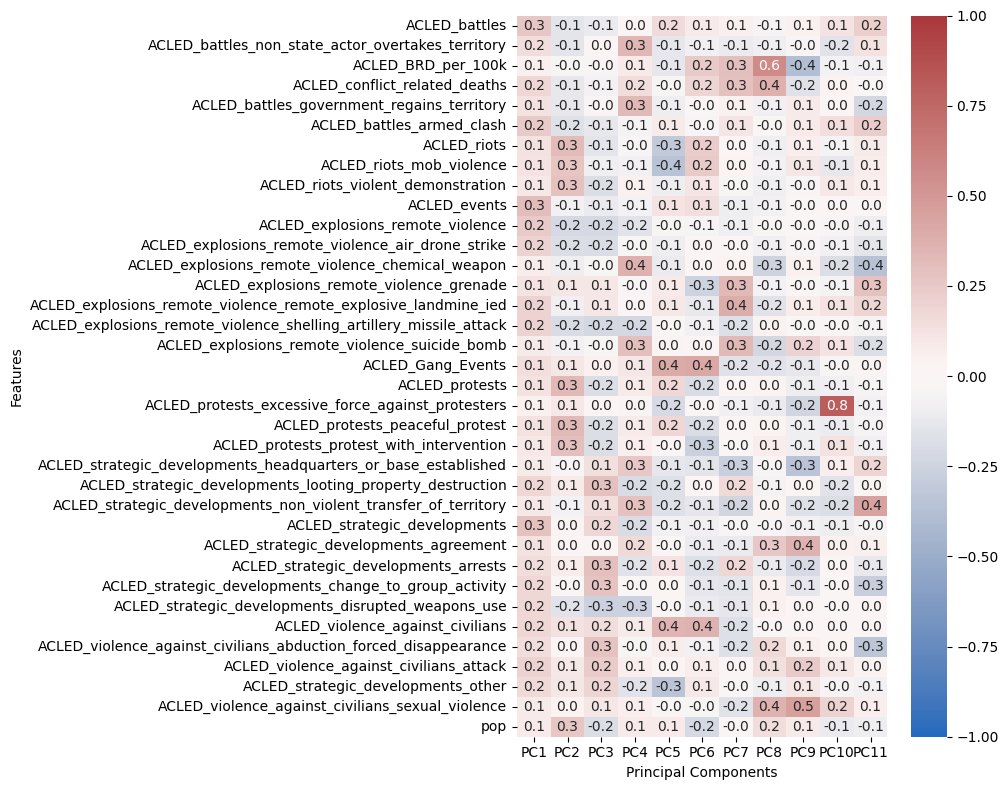

In [ ]:
# create heatmap from loadings_df using sns
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_df, cmap='vlag', vmin=-1, vmax=1, annot=True, fmt=".1f")
# plt.title('PCA Loadings Heatmap')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

In [ ]:
# Round for readability
print(loadings_df.round(2))



                                                     PC1   PC2   PC3   PC4  \
ACLED_battles                                       0.27 -0.14 -0.11  0.00   
ACLED_battles_non_state_actor_overtakes_territory   0.15 -0.14  0.01  0.34   
ACLED_BRD_per_100k                                  0.06 -0.04 -0.03  0.09   
ACLED_conflict_related_deaths                       0.18 -0.13 -0.06  0.15   
ACLED_battles_government_regains_territory          0.13 -0.13 -0.03  0.33   
ACLED_battles_armed_clash                           0.25 -0.17 -0.13 -0.06   
ACLED_riots                                         0.13  0.32 -0.14 -0.03   
ACLED_riots_mob_violence                            0.12  0.27 -0.09 -0.07   
ACLED_riots_violent_demonstration                   0.10  0.28 -0.18  0.05   
ACLED_events                                        0.31 -0.08 -0.12 -0.07   
ACLED_explosions_remote_violence                    0.25 -0.22 -0.21 -0.15   
ACLED_explosions_remote_violence_air_drone_strike   0.20 -0.18 -

### Physical Interpretation

#### PC1- General Conflict & Violence Intensity,PC1 represents the overall intensity and scale of violent conflict — capturing general levels of battle activity, explosions, and associated deaths.

#### PC2 – Civic Unrest and Protest Activity, PC2 captures civilian-driven unrest, including protests, riots, and demonstrations, especially with state involvement or suppression.

#### PC3 – PC3 captures escalation into irregular warfare and state-counterstate dynamics, rather than just violence types. It's a marker for radicalization, tactical transformation, and response cycles.

#### PC4 - PC4 captures localized or community-level violence

